**Zadanie 7 Laboratorium Statystycznej Eksploracji Danych**

**Autor:** Mateusz Wasiluk

**Temat:** Analiza skupień 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**Część I - Interpretacja danych przy pomocy mapy cieplnej**

Załadowanie danych dotyczących zwierząt

In [2]:
data = pd.read_csv('animals.csv')

In [3]:
data.head()

war  fly  ver  end  gro  hai
ant    1    1    1  1.0  2.0    1
bee    1    2    1  1.0  2.0    2
cat    2    1    2  1.0  1.0    2
cpl    1    1    1  1.0  1.0    2
chi    2    1    2  2.0  2.0    2

In [4]:
data.rename(columns={'war': "warm-blooded", 'fly': "can fly", 'ver': "vertebrate", 'end': "endangered", 
                     'gro': "live in groups", 'hai': "have hair"}, inplace=True)

In [5]:
data

warm-blooded  can fly  vertebrate  endangered  live in groups  have hair
ant             1        1           1         1.0             2.0          1
bee             1        2           1         1.0             2.0          2
cat             2        1           2         1.0             1.0          2
cpl             1        1           1         1.0             1.0          2
chi             2        1           2         2.0             2.0          2
cow             2        1           2         1.0             2.0          2
duc             2        2           2         1.0             2.0          1
eag             2        2           2         2.0             1.0          1
ele             2        1           2         2.0             2.0          1
fly             1        2           1         1.0             1.0          1
fro             1        1           2         2.0             NaN          1
her             1        1           2         1.0             2.0          1
lio             2        1           2         NaN             2.0          2
liz             1        1           2         1.0             1.0          1
lob             1        1           1         1.0             NaN          1
man             2        1           2         2.0             2.0          2
rab             2        1           2         1.0             2.0          2
sal             1        1           2         1.0             NaN          1
spi             1        1           1         NaN             1.0          2
wha             2        1           2         2.0             2.0          1

Mapa cieplna

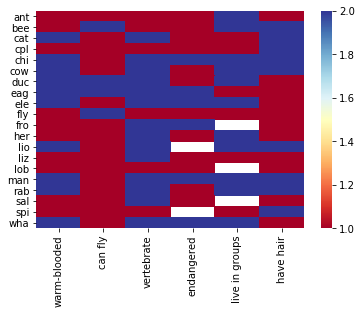

In [6]:
sns.heatmap(data, cmap='RdYlBu');

Dodatkowo narysowano mapę cieplną połączoną z dendrogramem. W tym celu brakujące wartości zastąpiono wartością 0.

In [7]:
data.fillna(0, inplace=True)

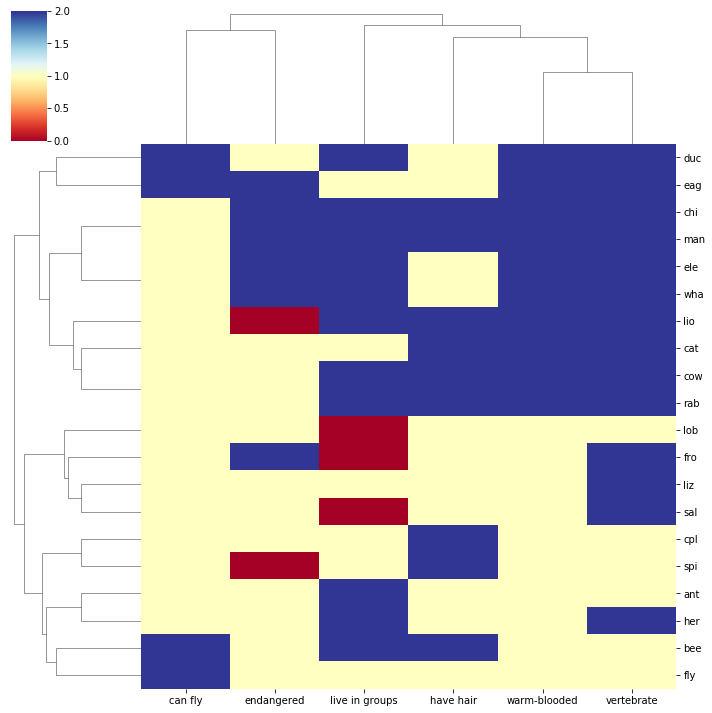

In [8]:
sns.clustermap(data, cmap='RdYlBu');

Przykładowe obserwacje i wnioski:
1. Większość ze zwierząt obecnych w zbiorze nie potrafi latać.
2. Widać silną korelację między byciem zwierzęciem stałocieplnym i kręgowym.
3. Większość ze zwierząt latających nie jest zagrożona.
4. Obecność włosów obserwuje się zarówno u kręgowców, jak i bezkręgowców.
5. Większość zagrożonych gatunków to zwierzęta kręgowe.
6. Najwięcej brakujących danych dotyczy życia w grupach.
7. W większości przypadków analiza skupień zgrupowała razem zwierzęta należące do tych samych gromad.


**Część II - Testy algorytmu k-means**

In [9]:
from sklearn import datasets
from sklearn.cluster import KMeans
from itertools import combinations

Załadowanie danych

In [10]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
y = pd.Series(iris.target)

In [11]:
X.head()

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

In [12]:
scores = []
col_combinations = list(combinations([0, 1, 2, 3], 2)) + list(combinations([0, 1, 2, 3], 3))
col_combinations += list(combinations([0, 1, 2, 3], 4))

Przygotowanie i testy algorytmów

In [13]:
for combination in col_combinations:
    kmeans = KMeans(n_clusters=len(y.unique()), random_state=0).fit(X[list(combination)])
    scores.append(kmeans.score(X[list(combination)]))

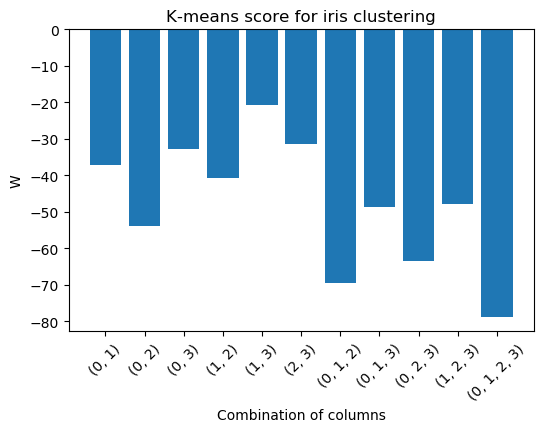

In [14]:
fig, ax = plt.subplots(dpi=100); 
ax.bar(range(len(col_combinations)), scores, tick_label=col_combinations)
plt.xticks(rotation=45)
ax.set_xlabel('Combination of columns'); 
ax.set_ylabel('W');
ax.set_title('K-means score for iris clustering')
plt.show()

Wnioski: Algorytm k-means osiąga najlepsze wyniki (najniższą wartość W), jeśli operuje na pełnym zbiorze danych iris.